## Train Models on the Balanced Data

### Load the Balanced Data

In [53]:
import pandas as pd

In [54]:
df_train = pd.read_csv('fraudTrainBalanced.csv')

In [55]:
len(df_train)

1296675

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   amt            1296675 non-null  float64
 2   gender         1296675 non-null  int64  
 3   zip            1296675 non-null  int64  
 4   city_pop       1296675 non-null  int64  
 5   unix_time      1296675 non-null  int64  
 6   is_fraud       1296675 non-null  int64  
 7   lat_diff       1296675 non-null  float64
 8   long_diff      1296675 non-null  float64
 9   category_code  1296675 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 98.9 MB


### Split the X and Y Axis

In [57]:
x = df_train.drop('is_fraud', axis=1)

In [58]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   amt            1296675 non-null  float64
 2   gender         1296675 non-null  int64  
 3   zip            1296675 non-null  int64  
 4   city_pop       1296675 non-null  int64  
 5   unix_time      1296675 non-null  int64  
 6   lat_diff       1296675 non-null  float64
 7   long_diff      1296675 non-null  float64
 8   category_code  1296675 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 89.0 MB


In [59]:
y = df_train[['is_fraud']]

In [60]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   is_fraud  1296675 non-null  int64
dtypes: int64(1)
memory usage: 9.9 MB


### Split Training and Test Set

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4)

### Train on Model - DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model_tree = DecisionTreeClassifier(random_state=4, max_depth=4)

In [65]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [66]:
y_predict = model_tree.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
cm = confusion_matrix(y_test, y_predict)

In [69]:
cm

array([[154522,  38160],
       [   643,  66010]], dtype=int64)

In [70]:
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))

In [71]:
accuracy

0.8503749975899898

In [72]:
import joblib

In [73]:
joblib.dump(model_tree, 'group4_prj_cc_fraud_model_cart')

['group4_prj_cc_fraud_model_cart']

### Train on Model - RandomForestClassifier

In [74]:
from sklearn import ensemble

In [75]:
model_rf = ensemble.RandomForestClassifier(random_state=4, max_depth=4)

In [76]:
model_rf.fit(x_train, y_train)

C:\Users\gopit\AppData\Local\Temp/ipykernel_23512/1462693802.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, random_state=4)

In [77]:
y_predict = model_rf.predict(x_test)

In [78]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[154691  37991]
 [   869  65784]]
0.8501552046580677


In [79]:
joblib.dump(model_rf, 'group4_prj_cc_fraud_model_rf')

['group4_prj_cc_fraud_model_rf']

### Train on Model - GradientBoostingClassifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
model_gb = GradientBoostingClassifier(random_state=4, max_depth=4)

In [82]:
model_gb.fit(x_train, y_train)

C:\Users\gopit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(max_depth=4, random_state=4)

In [83]:
y_predict = model_gb.predict(x_test)

In [84]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[154578  38104]
 [   385  66268]]
0.8515857867237357


In [85]:
joblib.dump(model_gb, 'group4_prj_cc_fraud_model_gb')

['group4_prj_cc_fraud_model_gb']

### Train on Model - LogisticRegression

In [86]:
from sklearn import linear_model

In [87]:
model_lr = linear_model.LogisticRegression(random_state=4)

In [88]:
model_lr.fit(x_train, y_train)

C:\Users\gopit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gopit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [89]:
y_predict = model_lr.predict(x_test)

In [90]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
accuracy = (cm[0,0] + cm[1,1])/(sum(sum(cm)))
print(accuracy)

[[192682      0]
 [ 66653      0]]
0.7429849422561552


In [91]:
joblib.dump(model_lr, 'group4_prj_cc_fraud_model_lr')

['group4_prj_cc_fraud_model_lr']

### Plot the Decision Tree Model

In [92]:
from sklearn.tree import export_text
feature_names = list(x.columns)
model_tree_text = export_text(model_tree, feature_names=feature_names)
print(model_tree_text)

|--- unix_time <= 1344732608.00
|   |--- amt <= 673.79
|   |   |--- amt <= 245.20
|   |   |   |--- amt <= 245.12
|   |   |   |   |--- class: 1
|   |   |   |--- amt >  245.12
|   |   |   |   |--- class: 0
|   |   |--- amt >  245.20
|   |   |   |--- category_code <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- category_code >  1.50
|   |   |   |   |--- class: 1
|   |--- amt >  673.79
|   |   |--- amt <= 1159.25
|   |   |   |--- category_code <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- category_code >  6.50
|   |   |   |   |--- class: 1
|   |   |--- amt >  1159.25
|   |   |   |--- cc_num <= 4931728839383449600.00
|   |   |   |   |--- class: 1
|   |   |   |--- cc_num >  4931728839383449600.00
|   |   |   |   |--- class: 0
|--- unix_time >  1344732608.00
|   |--- amt <= 696.23
|   |   |--- amt <= 258.64
|   |   |   |--- amt <= 24.18
|   |   |   |   |--- class: 0
|   |   |   |--- amt >  24.18
|   |   |   |   |--- class: 0
|   |   |--- amt >  258.64
|   |   |   |--- category

In [93]:
from sklearn import tree

[Text(167.4, 195.696, 'X[5] <= 1344732608.0\ngini = 0.382\nsamples = 1037340\nvalue = [770389, 266951]'),
 Text(83.7, 152.208, 'X[1] <= 673.795\ngini = 0.464\nsamples = 414893\nvalue = [151481, 263412]'),
 Text(41.85, 108.72, 'X[1] <= 245.2\ngini = 0.464\nsamples = 411895\nvalue = [150804, 261091]'),
 Text(20.925, 65.232, 'X[1] <= 245.125\ngini = 0.465\nsamples = 402140\nvalue = [147583, 254557]'),
 Text(10.4625, 21.744, 'gini = 0.465\nsamples = 402134\nvalue = [147578, 254556]'),
 Text(31.387500000000003, 21.744, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(62.775000000000006, 65.232, 'X[8] <= 1.5\ngini = 0.442\nsamples = 9755\nvalue = [3221, 6534]'),
 Text(52.3125, 21.744, 'gini = 0.367\nsamples = 1952\nvalue = [473, 1479]'),
 Text(73.2375, 21.744, 'gini = 0.456\nsamples = 7803\nvalue = [2748, 5055]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 1159.25\ngini = 0.35\nsamples = 2998\nvalue = [677, 2321]'),
 Text(104.625, 65.232, 'X[8] <= 6.5\ngini = 0.301\nsamples = 2241\nvalue 

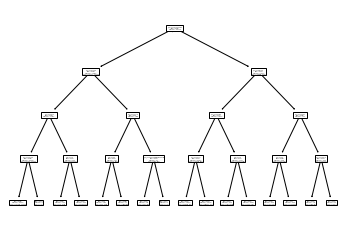

In [94]:
tree.plot_tree(model_tree)